In [1]:
def simplify_tag(t):
    if "+" in t:
        return t[t.index("+")+1:]
    else:
        return t
    
import re

In [2]:
import nltk
from nltk.corpus import floresta
train = floresta.tagged_sents()
train = [[(w.lower(),simplify_tag(t)) for (w,t) in sent] for sent in train if sent]

In [3]:
tagger0 = nltk.DefaultTagger('n')
tagger1 = nltk.UnigramTagger(train, backoff=tagger0)
tagger2 = nltk.BigramTagger(train, backoff=tagger1)

In [4]:
registro = ""
palavras = []
with open("../corpus/Bosque_CF_7.4_cgd.txt", "r", encoding = "ISO-8859-1") as file:
    for line in file:
        
        if len(registro) > 0:
            palavras.append(line)
        
        if line.find("id=\"2") >= 0:
            registro = line
        
        if len(registro) > 0 and line.find("</s>") >= 0:
            break
            
registro

'<s id="2" ref="CF1-3" source="CETENFolha n=1 cad=Opinião sec=opi sem=94a #W" forest="1" text="BRASÍLIA Pesquisa Datafolha publicada hoje revela um dado supreendente: recusando uma postura radical, a esmagadora maioria (77%) dos eleitores quer o PT participando do Governo Fernando Henrique Cardoso.">\n'

In [5]:
textRegex = re.compile(r'text=\"([^\"]+)\"')
frase = textRegex.findall(registro)[0]
frase

'BRASÍLIA Pesquisa Datafolha publicada hoje revela um dado supreendente: recusando uma postura radical, a esmagadora maioria (77%) dos eleitores quer o PT participando do Governo Fernando Henrique Cardoso.'

In [6]:
#tokens = nltk.word_tokenize(frase)
tokens = [palavra.split('\t')[0] for palavra in palavras]
pos = tagger2.tag(tokens)
for idx in range(0,len(tokens)-1):
    print(pos[idx][0] + ", " + pos[idx][1] + ", " + palavras[idx].split(' ')[2])

Brasília, n, PROP
Pesquisa=Datafolha, n, N
publicada, v-pcp, V
hoje, adv, ADV
revela, v-fin, V
um, art, ART
dado, n, N
supreendente, adj, ADJ
$: #9->0 
, n, 

recusando, v-ger, V
uma, art, ART
postura, n, N
radical, adj, ADJ
$, #14->0 
, n, 

a, prp, ART
esmagadora, adj, ADJ
maioria, n, N
$( #18->0 
, n, 

$77, n, NUM
%, n, N
$) #21->0 
, n, 

de, prp, PRP
os, art, ART
eleitores, n, N
quer, v-fin, V
o, art, ART
PT, n, PROP
participando, v-ger, V
de, prp, PRP
o, art, ART
Governo, n, N
Fernando=Henrique=Cardoso, n, PROP
$. #33->0 
, n, 



In [7]:
pos = nltk.pos_tag(tokens)
sentt = nltk.ne_chunk(pos)
print(sentt)

(S
  (PERSON Brasília/NNP)
  Pesquisa=Datafolha/NNP
  publicada/NN
  hoje/NN
  revela/NN
  um/JJ
  dado/NN
  supreendente/VBD
  $: #9->0 
/JJ
  recusando/NN
  uma/JJ
  postura/JJ
  radical/JJ
  $, #14->0 
/NN
  a/DT
  esmagadora/JJ
  maioria/NN
  $( #18->0 
/JJ
  $77/CD
  %/NN
  $) #21->0 
/JJ
  de/FW
  os/FW
  eleitores/NNS
  quer/VBP
  o/JJ
  PT/NNP
  participando/NN
  de/FW
  o/FW
  Governo/NNP
  Fernando=Henrique=Cardoso/NNP
  $. #33->0 
/JJ
  </s>
/NN)


In [8]:
sentt

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpzh6oy_8k.png'

Tree('S', [Tree('PERSON', [('Brasília', 'NNP')]), ('Pesquisa=Datafolha', 'NNP'), ('publicada', 'NN'), ('hoje', 'NN'), ('revela', 'NN'), ('um', 'JJ'), ('dado', 'NN'), ('supreendente', 'VBD'), ('$: #9->0 \n', 'JJ'), ('recusando', 'NN'), ('uma', 'JJ'), ('postura', 'JJ'), ('radical', 'JJ'), ('$, #14->0 \n', 'NN'), ('a', 'DT'), ('esmagadora', 'JJ'), ('maioria', 'NN'), ('$( #18->0 \n', 'JJ'), ('$77', 'CD'), ('%', 'NN'), ('$) #21->0 \n', 'JJ'), ('de', 'FW'), ('os', 'FW'), ('eleitores', 'NNS'), ('quer', 'VBP'), ('o', 'JJ'), ('PT', 'NNP'), ('participando', 'NN'), ('de', 'FW'), ('o', 'FW'), ('Governo', 'NNP'), ('Fernando=Henrique=Cardoso', 'NNP'), ('$. #33->0 \n', 'JJ'), ('</s>\n', 'NN')])

In [9]:
# Downloads stanford-parser-full-2016-10-31.zip from https://nlp.stanford.edu/software/lex-parser.shtml#Download
# set java path
import os
java_path = r'/usr/bin/java'
os.environ['JAVAHOME'] = java_path
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='./stanford-parser.jar',
                               path_to_models_jar='./stanford-parser-3.8.0-models.jar')

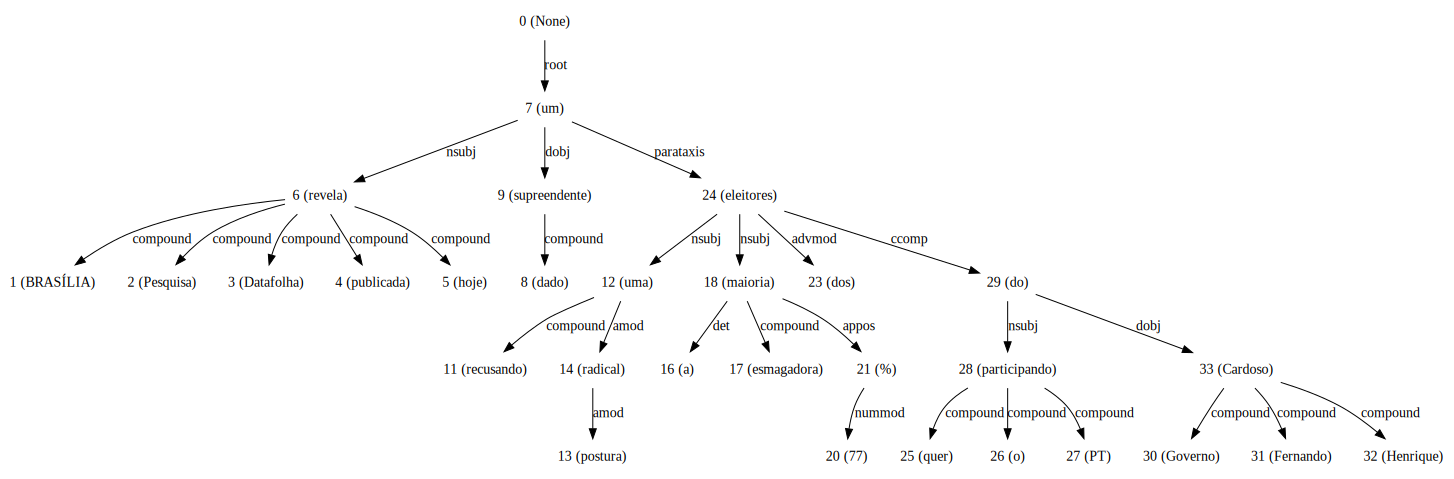

In [12]:
result = list(sdp.raw_parse(frase))  

result[0]